In [2]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from wordcloud import WordCloud, STOPWORDS

C:\Users\Admin\anaconda3\envs\tensorflow\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
train = pd.read_csv('corona.csv')


In [4]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",Extremely Negative


In [5]:
train.shape

(41157, 6)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [7]:
train.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [8]:
train.value_counts()

UserName  ScreenName  Location                      TweetAt     OriginalTweet                                                                                                                                                                                                                                                                                                       Sentiment         
3799      48751       London                        16-03-2020  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8                                                                                                                                                                                                     Neutral               1
31309     76261       Jakarta                       03-04-2020  With global panic buying, some countries moving towards food protectionism and more nations going into lockdown during the #coronavirus pandemic, foo

In [9]:
train.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [43]:
len(train)

32925

In [40]:
train.drop_duplicates() 

,TweetAt,Sentiment
1593,"few said was the end times. thought, even was, wed all living our trivial lives until the penultimate moment our demise, whereupon wed realizewed spent our last days the grocery store, buyin...",Neutral
8812,Essential workers police doctors nurses ambos teachers Journos amp add supermarket managers would still work amp their kids would still school with skeleton staff supervising That the model amp th...,Neutral
38649,the supermarket queue started talking nurse She was angry She said you lot journalists need stop calling heroes and angels and start asking the government what they done the NHS for the last ten y...,Extremely Negative
24306,UK-listed real estate lenders have sought reassure their investors after the #coronavirus crisis caused slump their share prices and uptick margin calls https://t.co/3Hfc6DoQqn,Negative
21134,COVID-19 Retail Worker Experience Thread work essential store; Im still working hour weeks and glad for the paycheck. But come into contact with lot people. live alone hasnt been affecting muc...,Negative
...,...,...
10546,Don panic Our guide where buy toilet paper during the Covid outbreak and best deals online now,Positive
28547,Wearing facemask decreases the chances speading #coronavirus whereas facemask with goggles and gloves completely stops it. Please design and mass produce more simpler consumer version the below on...,Positive
3753,"the #coronavirus makes impact around the world, many consumers are shopping online purchase the items that they need. Here are things that #eCommerce businesses can prepare for the coronavirus pan...",Neutral
35618,Interesting insight from business experts predicting how consumers will react post #COVID19 https://t.co/t4ie3VDiaN,Positive


In [42]:
len(train)

32925

In [10]:
train.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

In [11]:
train['text'] = train.OriginalTweet

In [12]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P"
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",Positive,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",Extremely Negative,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don..."


In [13]:
#converting column into numeric data 
def change_def(x):
    if x ==  "Extremely Positive":
        return "1"
    elif x == "Extremely Negative":
        return "-1"
    elif x == "Negative":
        return "-1"
    elif x ==  "Positive":
        return "1"
    else:
        return "0"

train['label'] = train['Sentiment'].apply(lambda x:change_def(x))
train.label.value_counts()

1     18046
-1    15398
0      7713
Name: label, dtype: int64

In [14]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text,label
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,1
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",1
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",Positive,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",1
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",Extremely Negative,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",-1


In [15]:
def wordCloud(sentiment):
    text = ",".join(
               review for review in train[train['Sentiment'] == sentiment].OriginalTweet 
        if 'COVID' not in review and 'https' not in review and 'Covid' not in review)

    wordcloud = WordCloud(max_words=200, colormap='Set2', background_color="black").generate(text)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.figure(1,figsize=(12, 12))
    plt.title('Prevalent words in ' + sentiment + ' tweets', fontsize=19)
    plt.show()

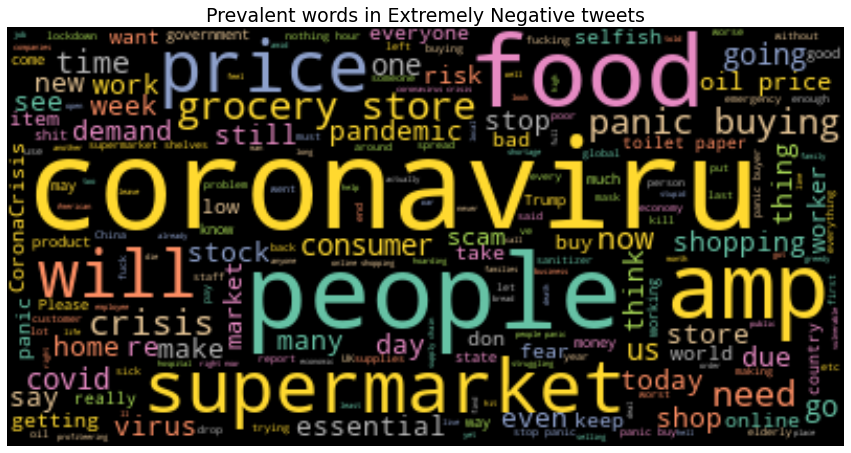

In [16]:
wordCloud("Extremely Negative")

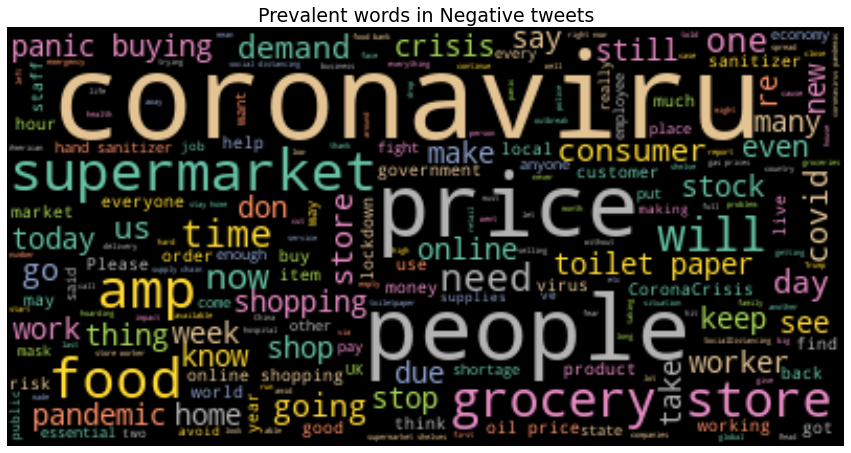

In [17]:
wordCloud("Negative")

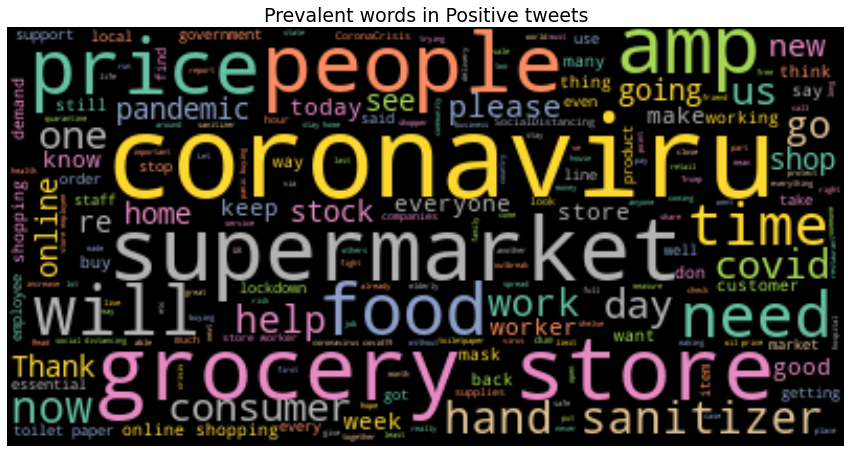

In [18]:
wordCloud("Positive")

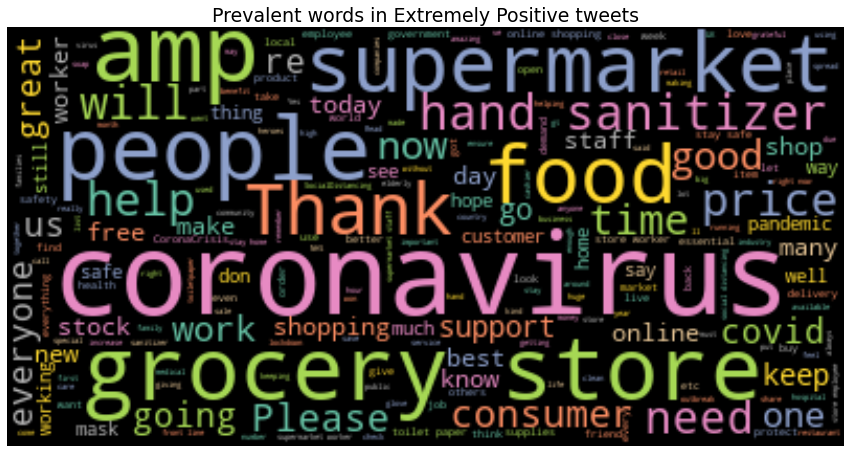

In [19]:
wordCloud("Extremely Positive")

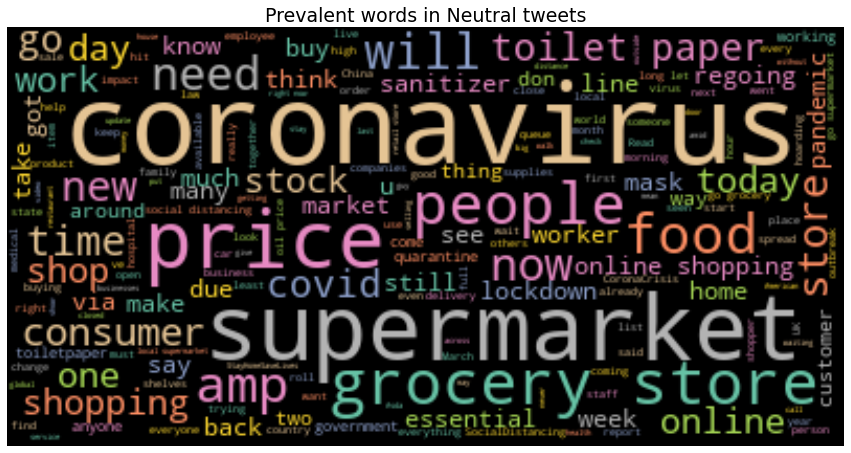

In [20]:
wordCloud("Neutral")

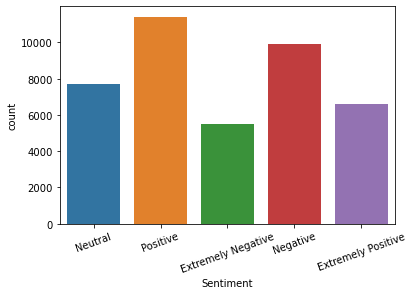

In [21]:
plot = sns.countplot(x='Sentiment', data=train).set_xticklabels(labels=['Neutral'
, 'Positive', 'Extremely Negative', 'Negative','Extremely Positive'],rotation=20)

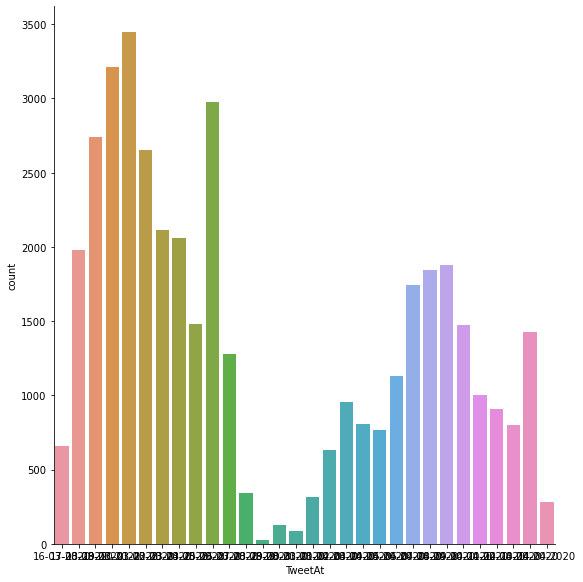

In [22]:
polt1=sns.catplot("TweetAt", data=train, kind="count", height=8)

In [23]:
# remove special characters, numbers, punctuations
train['TweetAt'] = train['TweetAt'].str.replace('[^a-zA-Z#]+',' ')

In [24]:
def remove_pattern(input_txt, pattern):    # write function for removing @user
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [25]:
train['TweetAt'] = np.vectorize(remove_pattern)(train['OriginalTweet'], '@[\w]*')  # create new column with removed @user

In [26]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text,label
0,3799,48751,London,https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,0
1,3800,48752,UK,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,1
2,3801,48753,Vagabonds,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P","Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",1
3,3802,48754,NaN,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...","My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",Positive,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",1
4,3803,48755,NaN,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...","Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",Extremely Negative,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",-1


In [27]:
#removing HTTP and URLS 
import re
train['OriginalTweet'] = train['OriginalTweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [28]:
#removing Shorts words...
train['TweetAt'] = train['TweetAt'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [29]:
def lower(text):
    low_text= text.lower()
    return low_text
train['text'] = train['text'].apply(lambda x:lower(x))

In [30]:
new_data = train[['TweetAt','Sentiment']]
new_data.head()

,TweetAt,Sentiment
0,https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,advice Talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular med...,Positive
2,"Coronavirus Australia: Woolworths give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,"food stock not the only one which empty... PLEASE, don't panic, THERE WILL ENOUGH FOOD FOR EVERYONE you not take more than you need. Stay calm, stay safe. #COVID19france #COVID_19 #COVID19 #corona...",Positive
4,"Me, ready supermarket during the #COVID19 outbreak. Not because I'm paranoid, but because food stock litteraly empty. The #coronavirus serious thing, but please, don't panic. causes shortage... #C...",Extremely Negative


In [31]:
#spitting data into ... train and test
train,test = train_test_split(new_data,test_size = 0.2,random_state=0,stratify = new_data.Sentiment.values)
print("train shape : ", train.shape)
print("test shape : ", test.shape)

train shape :  (32925, 2)
test shape :  (8232, 2)


In [32]:
#Use Of Counter Vectorizer For Multi Class Classification
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.TweetAt.values)
X_test = vectorizer.transform(test.TweetAt.values)

y_train = train.Sentiment.values
y_test = test.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (32925, 59221)
X_test.shape :  (8232, 59221)
y_train.shape :  (32925,)
y_test.shape :  (8232,)


In [33]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Testing accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9998481397114655
Testing accuracy Score :  0.5468901846452867
                    precision    recall  f1-score   support

Extremely Negative       0.37      0.69      0.48       582
Extremely Positive       0.32      0.72      0.44       582
          Negative       0.50      0.50      0.50      1966
           Neutral       0.82      0.56      0.67      2265
          Positive       0.62      0.50      0.55      2837

          accuracy                           0.55      8232
         macro avg       0.53      0.60      0.53      8232
      weighted avg       0.61      0.55      0.56      8232



In [34]:
logisticreg = LogisticRegression()

logisticreg.fit(X_train, y_train)

logisticreg_prediction = logisticreg.predict(X_test)
logisticreg_accuracy = accuracy_score(y_test,logisticreg_prediction)
print("Training accuracy Score    : ",logisticreg.score(X_train,y_train))
print("Testing accuracy Score : ",logisticreg_accuracy )
print(classification_report(logisticreg_prediction,y_test))

Training accuracy Score    :  0.9605163249810175
Testing accuracy Score :  0.6152818270165209
                    precision    recall  f1-score   support

Extremely Negative       0.61      0.67      0.64       996
Extremely Positive       0.59      0.69      0.64      1148
          Negative       0.56      0.56      0.56      1953
           Neutral       0.73      0.65      0.69      1735
          Positive       0.60      0.57      0.59      2400

          accuracy                           0.62      8232
         macro avg       0.62      0.63      0.62      8232
      weighted avg       0.62      0.62      0.62      8232



In [35]:
dump(vectorizer, "preprocessor.joblib")
dump(rf_clf, "classifier.joblib")

['classifier.joblib']